<img src="https://comp116sp19.cs.unc.edu/images/COMP116Logo.png" style="display:inline; width:200px" />

# Midterm Exam 1 for Section 1

**Don't Panic!**

You **may not use** _loops_ or any other loop variants such as _list comprehensions_. Any numpy functions are OK.

You **may not use the Internet** for anything except retrieving and submitting your exam. Any other use will be a violation of the Honor Code. 

You **must turn off wireless on your laptop** while you take the exam.

You **may use** any resources that you have stored locally on your computer and one 8" X 10" paper note.

Of course you **may not** use phones, friends, etc.

**Submitting your exam:**
  * Turn on wireless before you hit the submit button.
  * You must submit your exam notebook before you leave the room.
  * You must use a valid submit code.
  * You will get a positive acknowledgement that submission was successful.
  * You can check your [report](https://comp116sp19.cs.unc.edu/io/report/report.cgi) to see that
  the submission was successful.




## Setup

The following code sets up the environment.
You cannot and should not update the following cell.

In [1]:
# Save your work every 15 seconds
%autosave 15
%matplotlib inline

# imports needed for setup
import comp116
import numpy as np
import pickle
import pylab
check, report = comp116.start('Midterm1')

with open('Midterm1.data.pickle', 'rb') as fid:
    classroom, hourlyDepth, siteNames, COLS_TO_PLOT, FALLS_LAKE_SITE_NAME = pickle.load(fid)

# Protect you, as best I can, from accidentally modifying test data
classroom.flags.writeable = False 
hourlyDepth.flags.writeable = False 
siteNames.flags.writeable = False 
COLS_TO_PLOT.flags.writeable = False

Autosaving every 15 seconds


### Your Onyen, Section, Seat, and Pledge

#### Your Onyen
On this and all submissions, it's important to put your Onyen on it.

#### Section and seat

Please enter your section and seat to ensure you are taking the test that the system thinks you should be taking.

In [2]:
# Put your onyen between the quotes
Onyen = 'your case sensitive onyen here' # UPDATE THIS LINE WITH YOUR CODE

# If you are in the 12:30 T/TH class, set Section='1'
# If you are in the 2:00 T/TH class, set Section='2'
Section = '0' # UPDATE THIS LINE WITH YOUR CODE

# Your seat number should agree with attendance/Seating
Seat = '' # UPDATE THIS LINE WITH YOUR CODE

In [3]:
check('Q0 Onyen', Onyen.lower() in classroom[:, 1], points=1)
your_info = classroom[ classroom[:, 1] == Onyen ]
print(your_info)
check('Q0 Section', your_info[0,0] == Section, points=1)
check('Q0 Seat', your_info[0,2] == Seat, points=1)

Q0 Onyen incorrect
[]


IndexError: index 0 is out of bounds for axis 0 with size 0

#### Honor Pledge

I certify that **no unauthorized assistance** has been received or given in the completion of this work. 

Enter your full name as the value of the Pledge variable below.

**If you do not fill this in, you will receive a zero!**

In [ ]:
Pledge = '' # UPDATE THIS LINE WITH YOUR CODE

In [ ]:
check('Q0 Pledge', Pledge != '', points=1)

<img src="https://comp116sp19.cs.unc.edu/images/USGSLogo.png" style="float:right; width:100px" />

## Data

The non-string data, `hourlyDepth`, for this exam will be river gage height from the Neuse River from Falls Lake (Raleigh) to the Pamlico Sound (Atlantic Ocean).
The data comes from the US Geological Survey which monitors rivers in the United States.
I have taken the liberty of slightly modifing the actual data for your exam and the grader.

The columns are the station names which are in variable `siteNames` and the rows are the hourly readings.
You should not assume that the number of columns in the data used on your computer and that used by the grader are the same.
The data within the matrix should also not be assumed to be the same between your computer and the grader.

In other words, if asked for the number of columns and you _simply count_ the number of columns of the data used on your computer
the grader will grade it incorrect as it will be using different data.
You **MUST** calculate things programatically using Python functions.

The first twelve hours of data are:

In [4]:
print('Neuse river depth from Falls Lake to the Pamlico Sound.')
comp116.array_to_html(hourlyDepth[:12], col_names=[siteNames])

Neuse river depth from Falls Lake to the Pamlico Sound.


,"BEAVERDAM CREEK AT DAM NEAR CREEDMOOR, NC","FALLS LAKE ABOVE DAM NR FALLS, NC","NEUSE RIVER NEAR FALLS, NC","NEUSE RIVER NEAR CLAYTON, NC","NEUSE RIVER AT SMITHFIELD, NC","NEUSE RIVER NEAR GOLDSBORO, NC","NEUSE RIVER AT KINSTON, NC"
0,254.48,254.44,3.80,6.48,14.10,16.50,14.63
1,254.48,254.44,3.67,6.58,14.09,16.52,14.63
2,254.46,254.43,3.76,6.68,14.08,16.54,14.64
3,254.43,254.42,3.75,6.78,14.09,16.55,14.66
4,254.45,254.40,3.76,6.87,14.09,16.57,14.66
5,254.42,254.39,3.74,6.95,14.10,16.59,14.68
6,254.40,254.37,3.70,7.02,14.12,16.60,14.69
7,254.40,254.36,3.76,7.08,14.15,16.61,14.69
8,254.38,254.37,3.72,7.14,14.19,16.62,14.70
9,254.37,254.36,3.73,7.20,14.24,16.63,14.71


`COLS_TO_PLOT` is a boolean that is the same length as `siteNames` and the same length as the number of columns in `hourlyDepth`.
Of course, `COLS_TO_PLOT` used by the grader will have different values than the one you use.
But you can be assured that the length of `COLS_TO_PLOT` will be the same as `siteNames` and `hourlyDepth`'s columns.

In [5]:
comp116.array_to_html(COLS_TO_PLOT.reshape(1, -1), row_names=['COLS_TO_PLOT'], col_names=siteNames)

,"BEAVERDAM CREEK AT DAM NEAR CREEDMOOR, NC","FALLS LAKE ABOVE DAM NR FALLS, NC","NEUSE RIVER NEAR FALLS, NC","NEUSE RIVER NEAR CLAYTON, NC","NEUSE RIVER AT SMITHFIELD, NC","NEUSE RIVER NEAR GOLDSBORO, NC","NEUSE RIVER AT KINSTON, NC"
COLS_TO_PLOT,False,False,False,False,True,False,True


# Questions

## Q1 Strings

The following questons test your knowledge of strings.

### Q1.1 First element of  `siteNames`'s third character

You're being asked for the first element of `siteNames`'s third character.
For example, an array `arr = np.array(['abcdefg', 'hijklmn', 'opqrstuvwxyz'])`'s  first element is the string `'abcdefg'`.
The third character of that string is `'c'`.

In [6]:
# What is the third character in the first site's name?
third_char_first_site = COLS_TO_PLOT[0][2] # UPDATE THIS LINE WITH YOUR CODE
print('The third character of the first element of siteNames is', third_char_first_site)

IndexError: invalid index to scalar variable.

In [7]:
check('Q1.1 third charactor of the first element', third_char_first_site, points=3)

NameError: name 'third_char_first_site' is not defined

### Q1.2 Middle character of the last `siteNames` element

In [8]:
# What is the middle character in the last site name?
middle_value = len(siteNames[-1])//2
print(middle_value)
middle_char_last_site = siteNames[-1][middle_value] # UPDATE THIS LINE WITH YOUR CODE
print('The middle character of the last element of siteNames is', middle_char_last_site)

13
The middle character of the last element of siteNames is T


In [9]:
check('Q1.2 middle charactor of the last element', middle_char_last_site, points=3)

Q1.2 middle charactor of the last element appears correct


## Q2 How long were the depth measurements recorded?

Calculate the integer number (whole number) of days and 
the integer number (whole number) of hours beyond the last day that measurements were taken.

In [10]:
# How many days were the measurements in hourlyDepth?
days  = len(hourlyDepth)//24 # UPDATE THIS LINE WITH YOUR CODE
# Beyond `days`, how many hours were the measurements in hourlyDepth
hours = len(hourlyDepth)%24 # UPDATE THIS LINE WITH YOUR CODE
print('The measurement in depthHourly went for', days, 'days and', hours, 'hours.')

The measurement in depthHourly went for 31 days and 0 hours.


In [11]:
check('Q2 the number of days being measured is', days, points=5)
check('Q2 the number of hours being measured is', hours, points=5)

Q2 the number of days being measured is appears correct
Q2 the number of hours being measured is appears correct


## Q3 average hourly measurements

What is the average of each of the sites (columns) of `hourlyDepth`?

In [12]:
# calculate the average of each of the sites
average_sites = np.zeros(len(hourlyDepth)) # UPDATE THIS LINE WITH YOUR CODE
average_sites = np.average(hourlyDepth, axis = 0 )
comp116.array_to_html(average_sites.reshape((1, -1)), col_names=siteNames, row_names=['average'])

,"BEAVERDAM CREEK AT DAM NEAR CREEDMOOR, NC","FALLS LAKE ABOVE DAM NR FALLS, NC","NEUSE RIVER NEAR FALLS, NC","NEUSE RIVER NEAR CLAYTON, NC","NEUSE RIVER AT SMITHFIELD, NC","NEUSE RIVER NEAR GOLDSBORO, NC","NEUSE RIVER AT KINSTON, NC"
average,252.443817,252.437097,2.954046,5.547621,12.633723,14.461788,14.151142


In [13]:
check('Q3 average for each site', average_sites, points=10)

Q3 average for each site appears correct


## Q4 Maximum of FALLS_LAKE_SITE_NAME site?

What is the maximum `hourlyDepth` of the column corresponding to FALLS_LAKE_SITE_NAME?

**NOTE:** `FALLS_LAKE_SITE_NAME` is a constant that is in `siteNames`.
Use `FALLS_LAKE_SITE_NAME` and `siteNames` to create a array of booleans
as an index to the columns of `hourlyDepth`.

In [14]:
# calculate the maximum of site FALLS_LAKE_SITE_NAME
falls_max = np.max(hourlyDepth[:,siteNames == FALLS_LAKE_SITE_NAME]) # UPDATE THIS LINE WITH YOUR CODE
print('The maximum depth level of', FALLS_LAKE_SITE_NAME, 'is', falls_max)

The maximum depth level of FALLS LAKE ABOVE DAM NR FALLS, NC is 254.44


In [15]:
check('Q4 max Falls Lake', falls_max, points=10)

Q4 max Falls Lake appears correct


## Q5 What is the column index and row index of the minimum value in `hourlyDepth`?

In [16]:
min_col_indx = np.argmin(np.min(hourlyDepth,axis = 0))# UPDATE THIS LINE WITH YOUR CODE
min_row_indx = np.argmin(np.min(hourlyDepth,axis = 1))# UPDATE THIS LINE WITH YOUR CODE
print('The smallest value hourlyDepth[', min_row_indx, ',',
     min_col_indx, ']=', hourlyDepth[min_row_indx, min_col_indx])

The smallest value hourlyDepth[ 290 , 2 ]= 1.67


In [17]:
check('Q5 minimum row index', min_row_indx, points=5)
check('Q5 minimum column index', min_col_indx, points=5)

Q5 minimum row index appears correct
Q5 minimum column index appears correct


### Q6 Two measurements in Falls lake

The first two sites (columns) of `hourlyDepth` are both in Falls Lake.
In general, two measurement sites within a lake should be about the same.
But as scientists, we know that two measurements in two sites might not be the same due to environmental issues.

How many hours (rows) did the two Falls Lake sites differ by more than 0.1 feet?

**NOTE:** np.abs() will return the absolute value of an array

In [18]:
# calculate the difference between the first column and the second column for each hour

# count up the number of times this difference is greater than 0.1
falls_diff_greater_than_one_tenth_foot = np.count_nonzero(np.abs(np.diff(hourlyDepth[:,:2]))> 0.1) # UPDATE THIS LINE WITH YOUR CODE
print('Only', falls_diff_greater_than_one_tenth_foot, ' measurements differ by more than 0.1 foot.')

Only 5  measurements differ by more than 0.1 foot.


In [19]:
check('Q6 two Falls Lake differ by more than 0.1 feet', falls_diff_greater_than_one_tenth_foot, points=20)

Q6 two Falls Lake differ by more than 0.1 feet appears correct


<img src="plot1.png" style="display:inline; width:200px; float:right" />

### Q7 Plot two **columns** of `hourlyDepth`

<font color='red'>The above should say columns not rows</font>

`COLS_TO_PLOT` is a array of booleans that is the same number of elements as `hourlyDepth` has columns.
Use `COLS_TO_PLOT` as an index to the columns `hourlyDepth` and plot those columns.

COLS_TO_PLOT= [False False False False  True False  True]


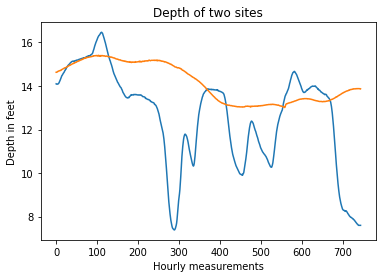

In [20]:
print('COLS_TO_PLOT=', COLS_TO_PLOT)
pylab.plot(hourlyDepth[:,COLS_TO_PLOT]) # UPDATE THIS AND ONLY THIS LINE

# DO NOT UPDATE THE FOLLOWING LINES OF CODE!!!!
pylab.title('Depth of two sites')
pylab.ylabel('Depth in feet')
pylab.xlabel('Hourly measurements')
two_row_plot = pylab.gcf()

In [21]:
check('Q7 plot two lines', two_row_plot, points=10)

Q7 plot two lines appears correct


<img src="plot2.png" style="display:inline; width:200px; float:right" />

### Q8 Plot two columns of `hourlyDepth` average height per day

`COLS_TO_PLOT` is a array of booleans that is the same number of elements as `hourlyDepth` has columns.
Use `COLS_TO_PLOT` as an index to the columns in `hourlyDepth`.  

Plot the first column of `COLS_TO_PLOT` as a line that is the average height per day.
Plot the second column of `COLS_TO_PLOT` as a bar chart that is the average height per day.

**NOTE:** This problem is broken down into multiple steps.
You can solve **Q8.1** for the line graph daily average, **Q8.1** for the bar graph daily average, or
**Q8.2** for the x axis array before the final **Q8.2** bar/line graph.

#### Q8.1 Get columns slice to plot and compute the daily average for the line and bar of Q8.2

 1. Create `columns_slice` to be a boolean slice of the `hourlyDepth` columns indicated by the `COLS_TO_PLOT`.  
 1. The next two lines, which you do not have to update, create `line_slice` to be the first column of the `columns_slice`
and `bar_slice` to be the second column of the `columns_slice`.
 1. Finally create `line_daily_average` and `bar_daily_average` to be 
 the average of `line_slice` and `bar_slice` reshaped into days .
 
**NOTE:** You may want to use problem decomposition and problem determination to print out values
of each step to ensure correctness.

In [30]:
columns_slice = hourlyDepth[:,COLS_TO_PLOT] # UPDATE THIS LINE WITH YOUR CODE

line_slice = columns_slice[:, 0] # NO NEED TO UPDATE THIS
bar_slice = columns_slice[:, 1] # NO NEED TO UPDATE THIS

line_daily_average = np.average(np.reshape(line_slice,((np.shape(line_slice)[0])//24,24)),axis=1 ) # UPDATE THIS LINE WITH YOUR CODE
bar_daily_average = np.average(np.reshape(bar_slice,((np.shape(bar_slice)[0])//24,24)),axis=1 ) # UPDATE THIS LINE WITH YOUR CODE


In [26]:
check('Q8.1 line daily average', line_daily_average, points=5)
check('Q8.1 bar daily average', bar_daily_average, points=5)

Q8.1 line daily average appears correct
Q8.1 bar daily average appears correct


<img src="plot2.png" style="display:inline; width:200px; float:right" />

#### Q8.2 Plot the line daily average and the bar daily average

Use the `line_daily_average` and the `bar_daily_average` from **Q8.1** to create a plot like the one at the right with the x axis starting at zero up to the number of days minus one. 

You will have to:
 * Add the title **Line and bar**
 * Add the xlabel **Daily average**
 * Add the ylabel **Depth in feet**

In [ ]:
x_axis = np.arange(len(bar_daily_average)) # UPDATE THIS LINE WITH YOUR CODE
pylab.plot(x_axis,line_daily_average, 'r') # UPDATE THIS LINE WITH YOUR CODE
pylab.bar(x_axis,bar_daily_average) # UPDATE THIS LINE WITH YOUR CODE

pylab.title('Line and bar')
pylab.ylabel('Depth in feet')
pylab.xlabel('Daily average')

# THIS LINE MUST BE THE LAST IN THE CELL
line_and_bar_plot = pylab.gcf() # DO NOT UPDATE THIS LINE

In [ ]:
check('Q8.2 x_axis', x_axis, points=5)
check('Q8.2 line and bar', line_and_bar_plot, points=5)

In [ ]:
# It is going to check that your Onyen and Pledge are filled out correctly.
# If they are not filled out correctly, you should go back to the unlocker and execute the Submit your exam.
report(Onyen, Pledge)
print('The submit button for the quiz is in the ExamUnlocker notebook')

## Done!
<img src="restartAndClearOutput.png" width="300" style="float: right" />

Now go back, restart the kernel (menu <font color="green">Kernel</font>-><font color="green">Restart and Clear</font>), and then Shift-Enter your way through the notebook to run all the cells again so you an be sure all your code will work as you expect during grading.

## Saving your work
<img src="saveAndCheckpoint.png" width="300" style="float: right" />

Now save your work by going to (menu <font color='green'>File</font>-><font color='green'>Save and Checkpoint</font>)

## Close this notebook and then go back to the Exam1AUnlocker
<img src="closeAndHalt.png" width="300" style="float: right" />

Before going back to the Exam1AUnlocker and submit your work, you'll need to go close this
notebook (menu <font color='green'>File</font>-><font color='green'>Close and Halt</font>.)


Note that if you actually saved your work you should not see the leaving site message below.
If you do see the `Leave Site` warning, cancel and save your work again.
<br />
<img src="leaveSite.png" width="300" style="float: left" />